## Project Title :  Seoul Bike Sharing Demand Prediction

## Problem Description
## Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## Data Description
## The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## Attribute Information:
### Date : year-month-day
### Rented Bike count - Count of bikes rented at each hour
### Hour - Hour of he day
### Temperature-Temperature in Celsius
### Humidity - %
### Windspeed - m/s
### Visibility - 10m
### Dew point temperature - Celsius
### Solar radiation - MJ/m2
### Rainfall - mm
### Snowfall - cm
### Seasons - Winter, Spring, Summer, Autumn
### Holiday - Holiday/No holiday
### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Importing modules and loading dataset

In [124]:
## Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

In [2]:
## importing the dataset 

bike_df = pd.read_csv("SeoulBikeData.csv",encoding='latin')

## Discovering the Data
## Getting information about the Data

In [3]:
# getting the top 5 rows
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Getting the last 5 rows
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# Renaming the Column names for simplicity

bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [6]:
#Getting the shape of dataset
bike_df.shape

(8760, 14)

In [7]:
#checking info about the data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [8]:
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [9]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [10]:
bike_df.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

In [11]:
#checking for null values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [12]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print(value)


0


## After checking for the missing and duplicate values we came to know that we don't have any missing and duplicate values.

In [13]:
# Changing the "Date" column into three "year","month","day" column

bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [14]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 
december to 2018 november so if i consider this is a one year then we dont need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't
need each day of each month data but we need the data about, if a day is a weekday or a weekend 
so we convert it into this format and drop the "day" column.

In [15]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [132]:
bike_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [17]:
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [18]:
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [19]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [20]:
#Changing the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

## Exploratory Data Analysis of the Dataset

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

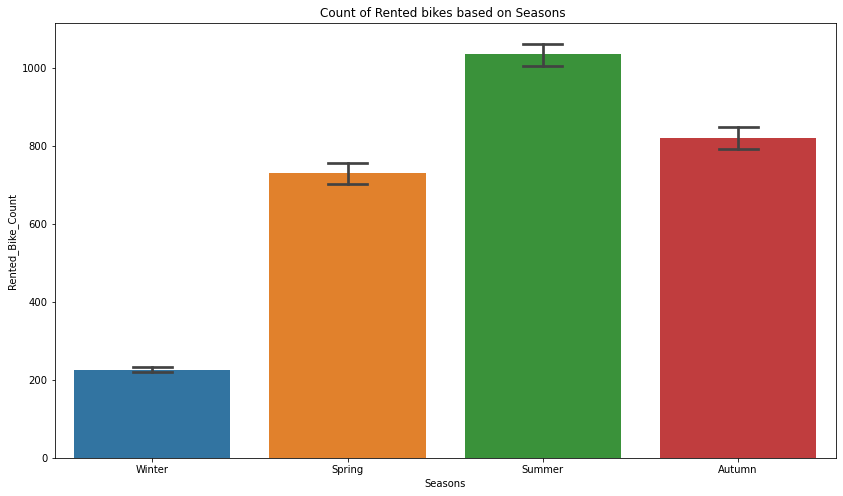

In [22]:
#analysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on Seasons ')

The above plot shows that in summer season the use of rented bike is high whereas in winter season the use of rented bike is very low.

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

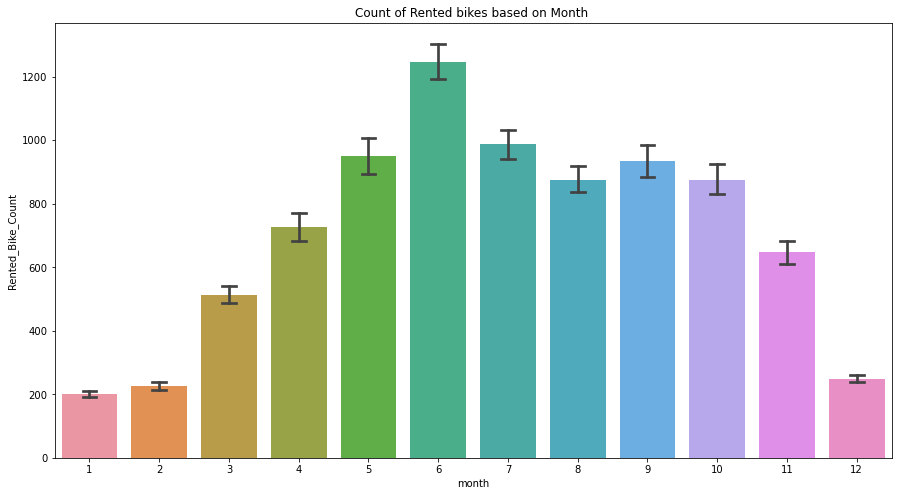

In [23]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on Month ')

The above bar plot clearly shows that from the month 5 to 10 the demand of the rented bike is high as compare to other months.

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

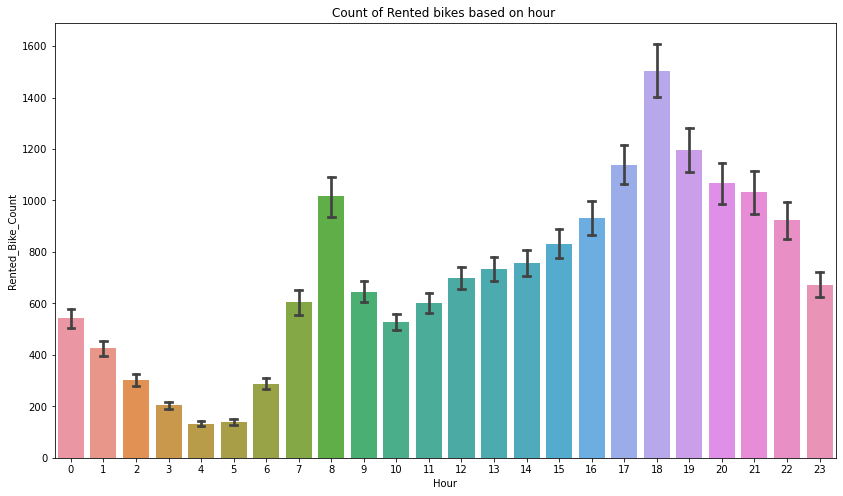

In [24]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on hour ')

he above plot clearly shows that people generally use rented bikes during their working hour from 7am to 9am and 5pm to 8pm.

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

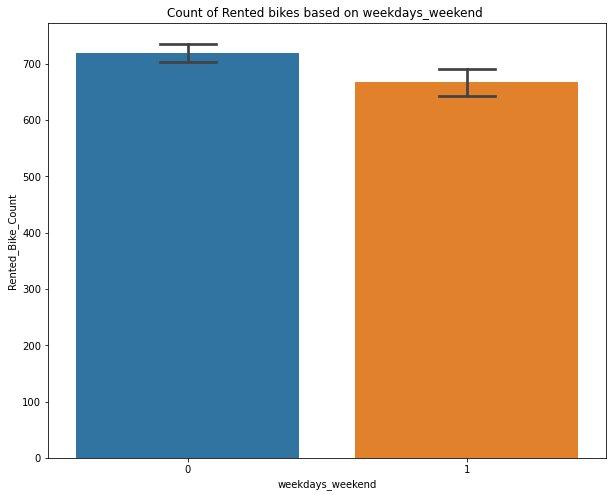

In [25]:
#analysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

The above plot shows that in the week days which is in blue colur tells that the demand of the bike is higher because of the office as compare to the weekend.

[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

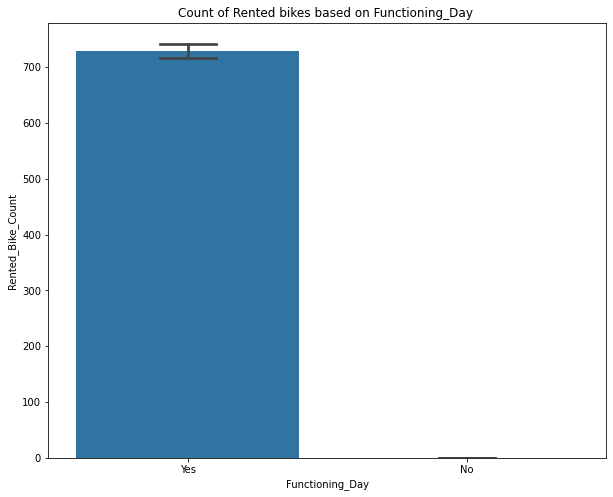

In [26]:
#analysis of data by vizualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on Functioning_Day ')

The above plot shows that people use rented bike only in functioning day.

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

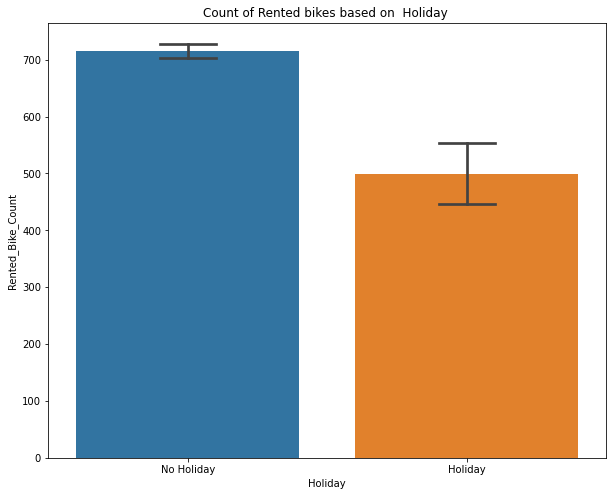

In [27]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes based on  Holiday ')

The above plot shows that use of rented bike is more on no holiday as compare to holiday.

## Visualizing Distributions

## Visualizing numerical variables distplot

In [28]:
#assigning numerical coulmn to variable
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

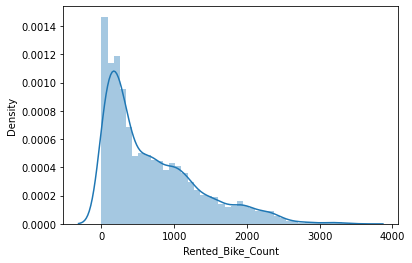

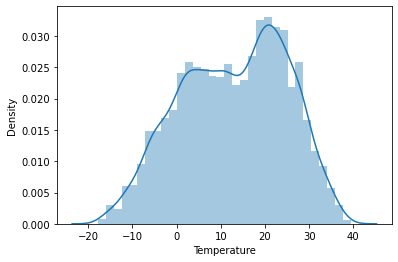

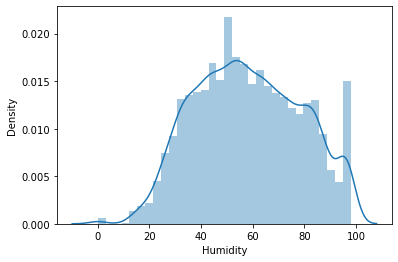

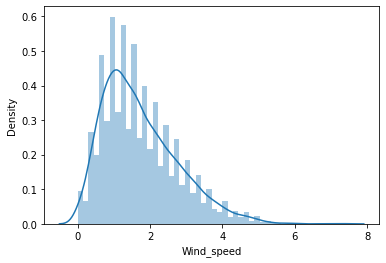

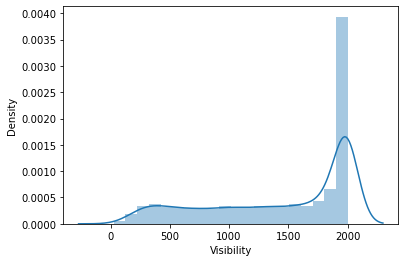

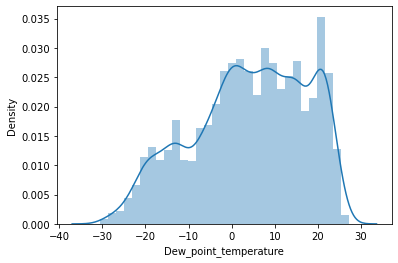

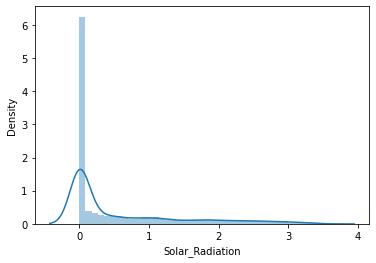

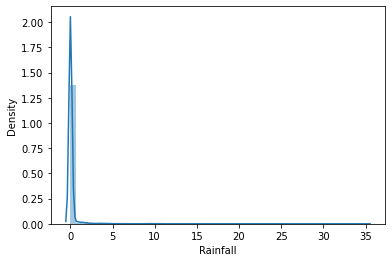

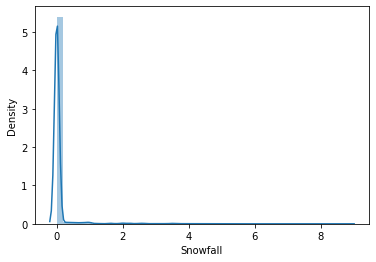

In [29]:
#plotting distplots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(6,4))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

From the above plots we see that some of them are rightly skewed and some are leftly skewed.

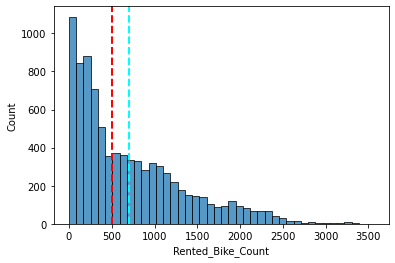

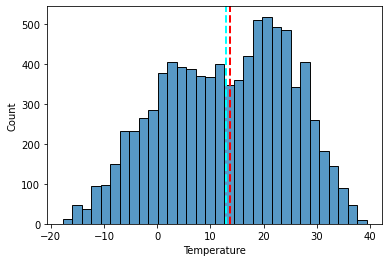

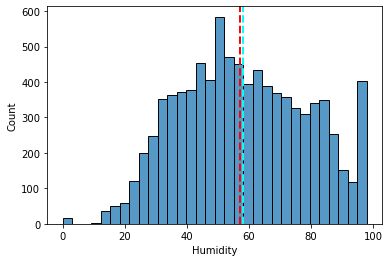

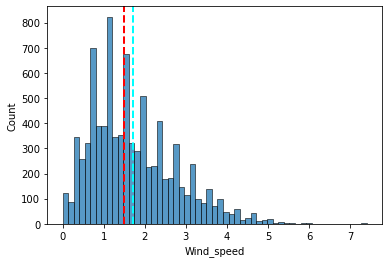

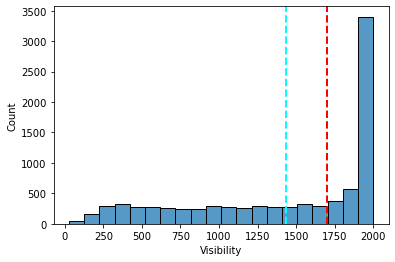

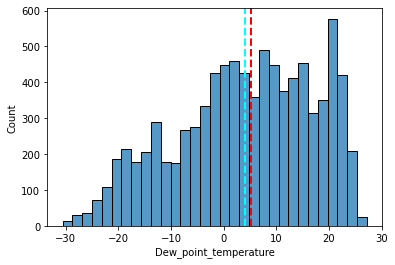

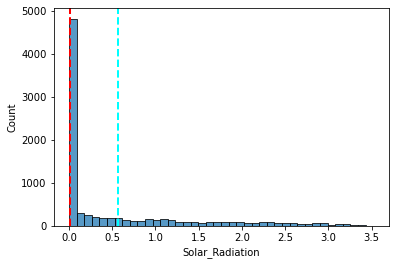

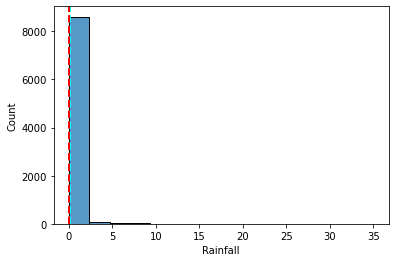

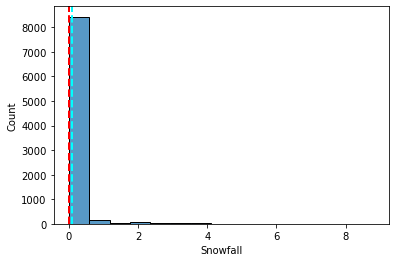

In [30]:
#plotting histogram with mean and median

for col in numerical_features[:]:
  sns.histplot(bike_df[col])
  plt.axvline(bike_df[col].mean(), color='cyan', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

From Histplots we can conclude that the features which are skewed, their mean and the median are also skewed.

## Regression plotting

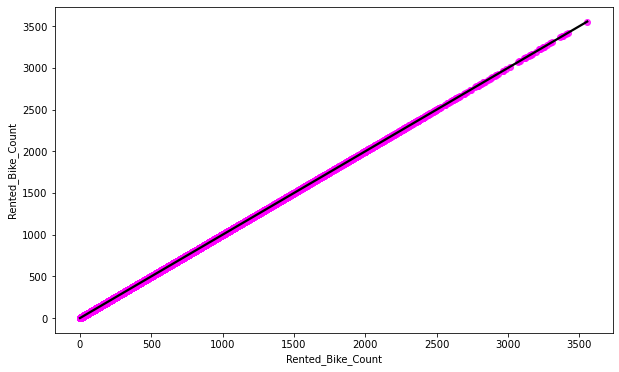

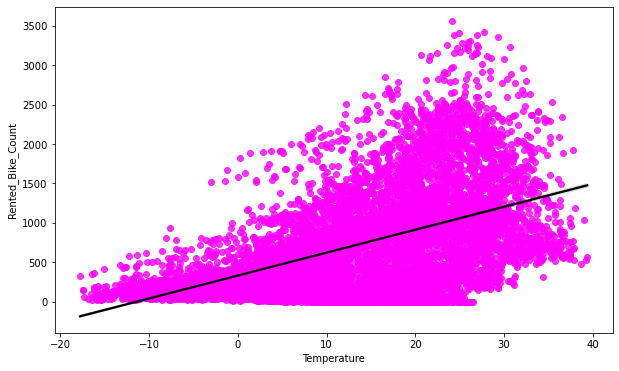

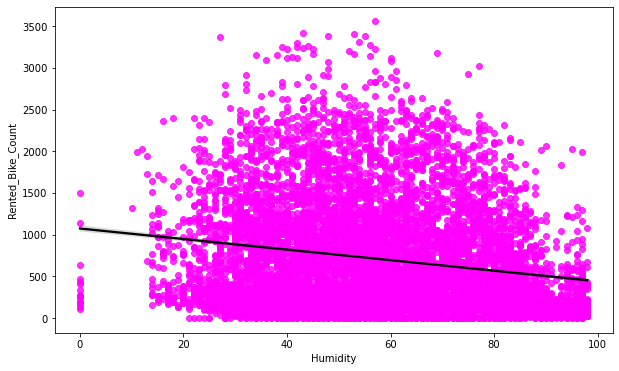

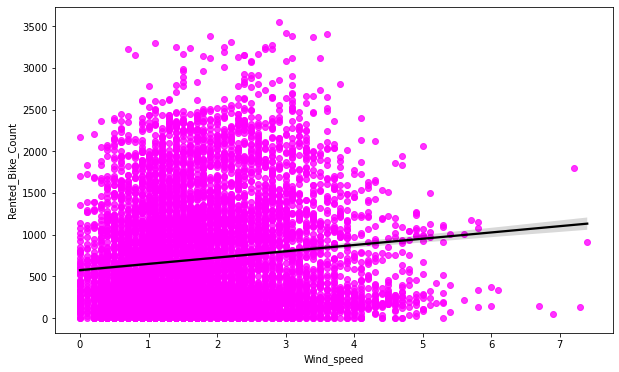

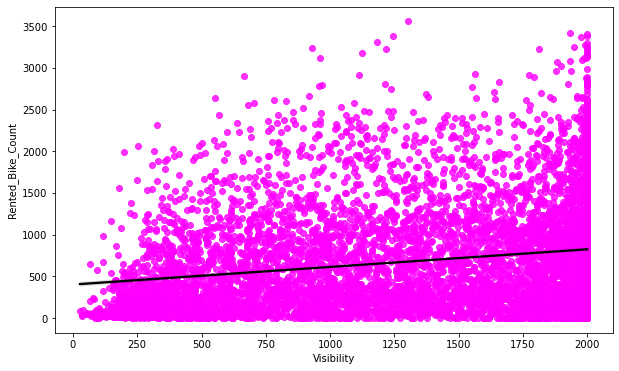

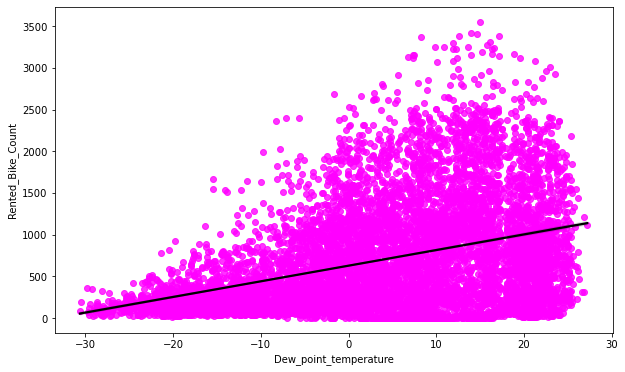

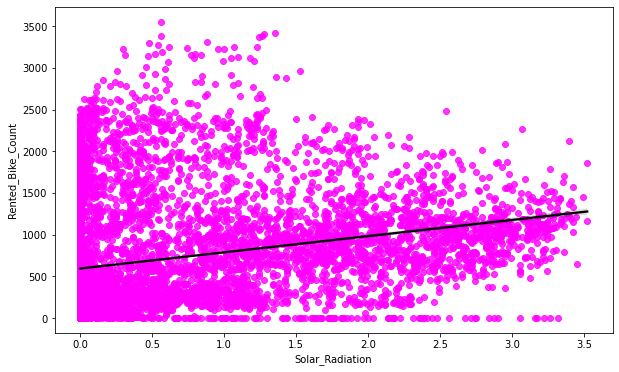

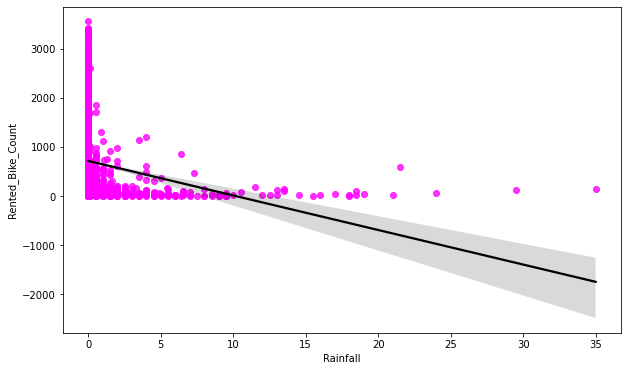

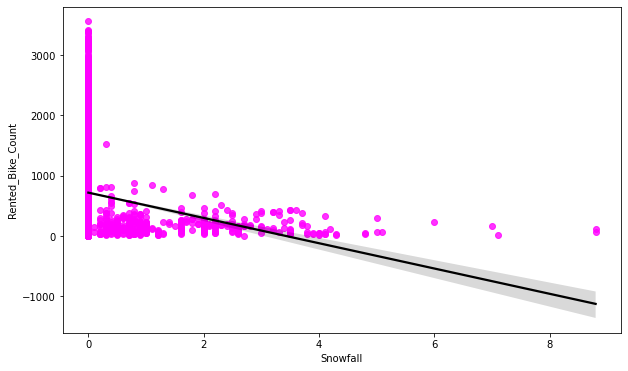

In [31]:
#plotting the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'magenta'}, line_kws={"color": "black"})

From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature'and 'Solar_Radiation' are positively related to the dependent variable. which means that the rented bike count increases with increase of these features.

Whereas, 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable which means that the rented bike count decreases when these features increases.

## Normalised Rented_Bike_Count column data.

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Density'>

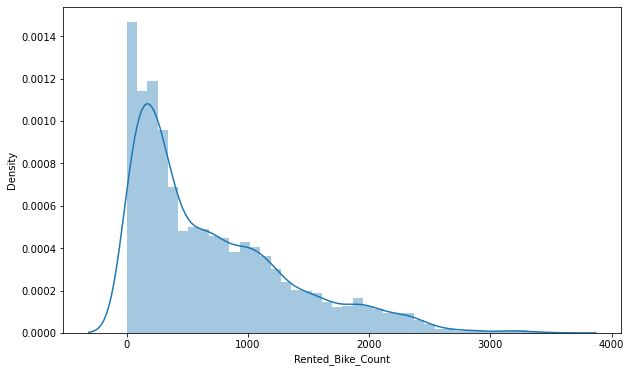

In [32]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(bike_df['Rented_Bike_Count'])

The above graph shows that Rented Bike Count has moderate right skewness. And we know that the assumption of 
linear regression tells us that the distribution of dependent variable has to be normal, so we should perform 
some operation to make it normal.

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Density'>

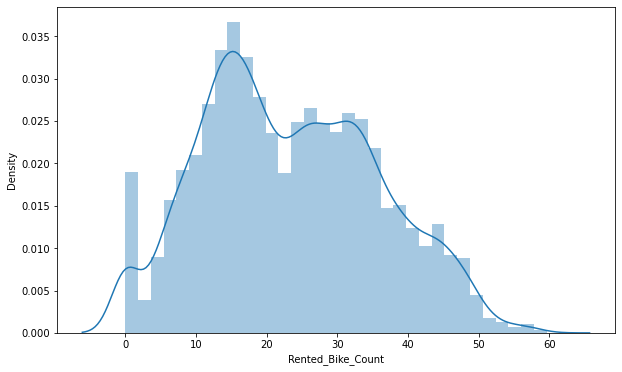

In [33]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']))

After applying Square root to the skewed Rented Bike Count, we get almost normal distribution.

## Checking correletion betweeen variables using Correlation heatmap.

<AxesSubplot:>

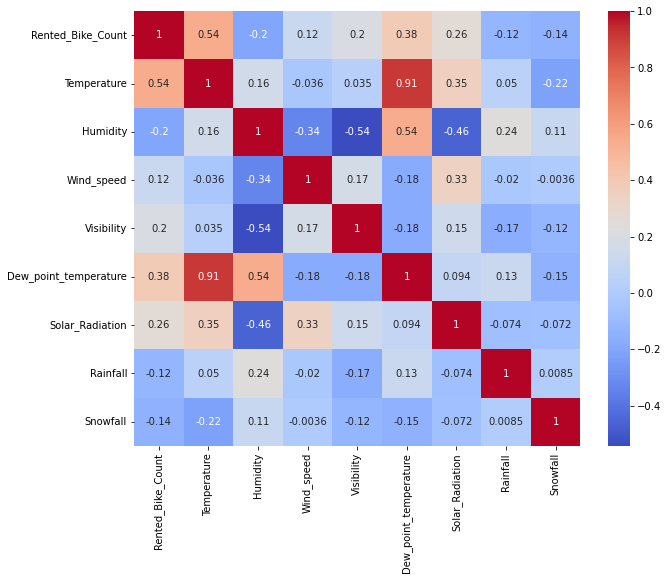

In [34]:
#plotting correlation graph
plt.figure(figsize=(10,8))
sns.heatmap(bike_df.corr(),annot=True,cmap='coolwarm')

From the above correlation graph we get to know that some features are positively correlated with target variable and some are negatively correlated.

And it also shows that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affect the outcome of our analysis. so we can drop the column 'Dew point temperature(°C)'.

In [35]:
#droping the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [36]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## Creating dummy variable and doing one hot encoding.

In [37]:
# Using Pandas get Dummies for Encoding categorical features
new_bike_df=pd.get_dummies(bike_df,drop_first=True,sparse=True)

In [125]:
new_bike_df.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


## Model Training

## Train Test split for regression

In [39]:
#Assigning the value in X and Y
X = new_bike_df.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(new_bike_df['Rented_Bike_Count'])

In [128]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [130]:
X["Holiday_No Holiday"].value_counts()

1    8328
0     432
Name: Holiday_No Holiday, dtype: int64

In [41]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

## Implementing Linear Regression

In [42]:
#Creating test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [43]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [44]:
#checking the score
reg.score(X_train, y_train)

0.7722101547859203

In [45]:
#checking the coefficeint
reg.coef_

array([ 5.11538390e-01, -1.27236082e-01, -2.90137768e-02,  9.90611044e-04,
        8.89699453e-01, -1.48171470e+00, -8.13633119e-02, -2.04211019e+00,
       -4.95822509e+00, -7.23630470e+00, -9.51882153e+00, -9.04458056e+00,
       -4.03214047e+00,  2.27462980e+00,  7.54438866e+00,  1.25491567e+00,
       -3.27047218e+00, -3.46014111e+00, -2.74135781e+00, -2.96341187e+00,
       -3.18317874e+00, -1.92136340e+00,  1.11918555e-01,  3.83216177e+00,
        1.02397842e+01,  6.78230267e+00,  6.08102819e+00,  6.20280511e+00,
        5.04597762e+00,  1.46736099e+00, -8.44748945e+08, -2.04892130e+09,
       -5.98309991e+08,  3.51130859e+00,  2.82758276e+01, -8.13449971e-01,
        2.46438957e+08,  2.46438958e+08,  2.46438961e+08,  1.45061132e+09,
        1.45061132e+09,  1.45061131e+09, -5.98309985e+08, -5.98309983e+08,
       -5.98309983e+08,  2.07210332e+00, -1.42458879e+00])

In [46]:
#getting the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [47]:
#importing package
from sklearn.metrics import mean_squared_error

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288799195
RMSE : 5.922627194749975
MAE : 4.474023663541968
R2 : 0.7722101547859203
Adjusted R2 : 0.767211964904939


Here r2 score value is 0.77 that means our model is able to capture most of the data variance.

In [48]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [49]:
#importing package
from sklearn.metrics import mean_squared_error

#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2)

MSE : 33.275329289291626
RMSE : 5.768477207139821
MAE : 4.4101780312221734
R2 : 0.7893518584669603
Adjusted R2 : 0.784729793736777


The r2_score for the test set is 0.78, it means that our linear model is performing well on the data.

In [50]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

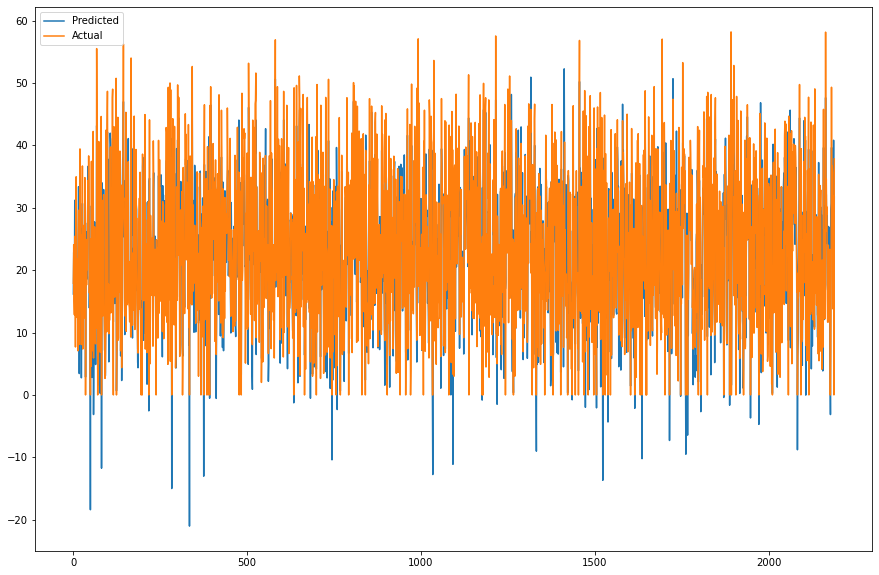

In [51]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

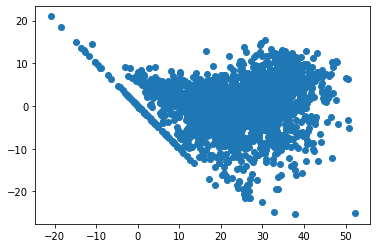

In [52]:
#Checking Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

## Implementing Lasso regression

In [53]:
#Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [54]:
#getting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


Here r2 score is 0.40 so it means that our model is not able to capture most of the data variance.

In [55]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [56]:
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


The r2_score for the test set is 0.38 it means that our linear model is not performing well on the data.

In [57]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

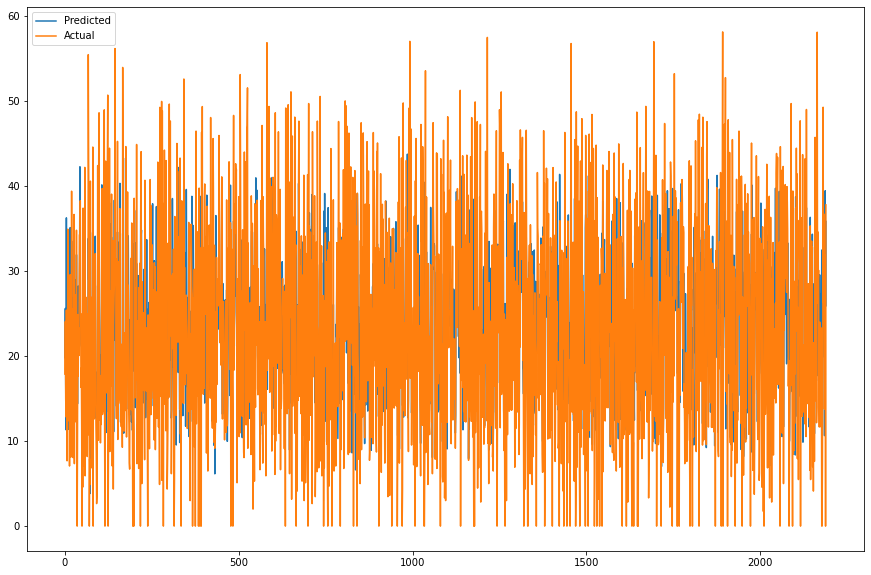

In [58]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

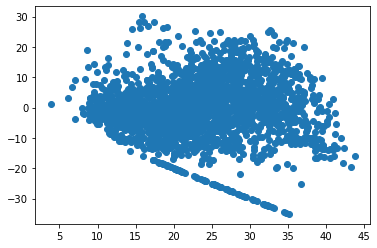

In [59]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

## Implementing Ridge Regression

In [60]:
#importing package
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [61]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [62]:
#checking score
ridge.score(X_train, y_train)

0.7722100789802107

In [63]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [64]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.47412577612538
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


Here r2 score value is 0.77 it means that our model is able to capture most of the data variance.

In [65]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [66]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539516
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


Here the r2_score for the test set is 0.78 it means that our linear model is performing well on the data.

In [67]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

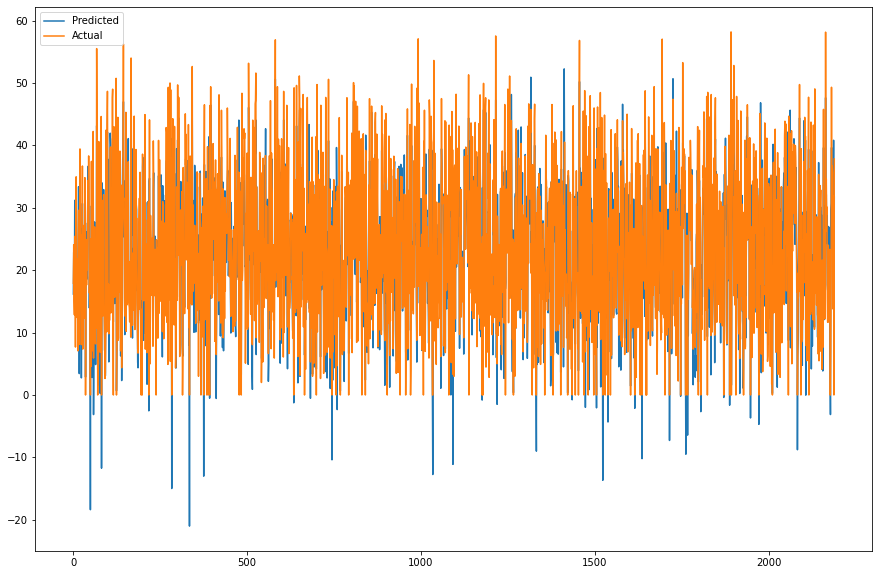

In [68]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

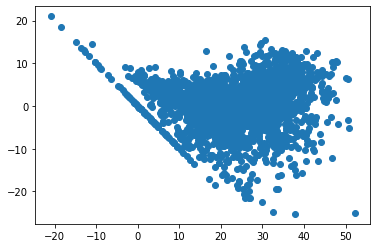

In [69]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

## Implementing Elastic net Regression

In [70]:
#importing package
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [71]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [72]:
#checking score
elasticnet.score(X_train, y_train)

0.6261189054494012

In [73]:
#getting X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [74]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


Here r2 score value is 0.62 it means that our model is able to capture most of the data variance.

In [75]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [76]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59.451205363500435
RMSE : 7.710460775044539
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


Here r2_score for the test set is 0.62 it means that our linear model is performing well on the data.

In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

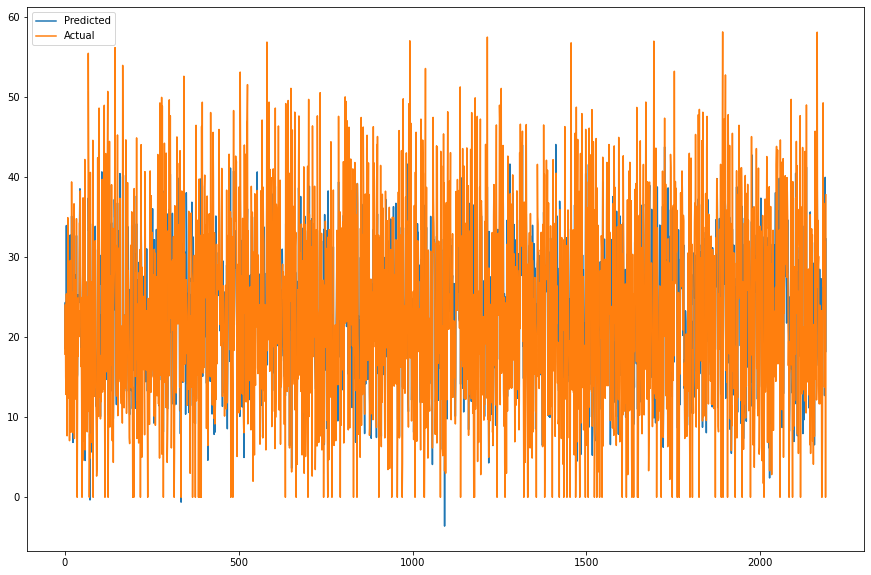

In [78]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

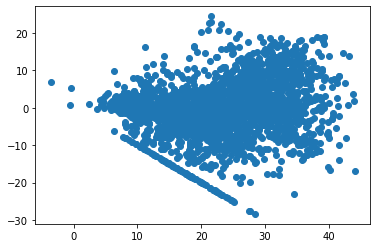

In [79]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

## Implementing Decision Tree Regression

In [80]:
#importing package
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [81]:
#getting the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [82]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE)


#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_d)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.7117921971992842
MSE : 44.38131518839574
RMSE : 6.661930289968197
MAE : 4.8493601659185215
R2 : 0.7117921971992842
Adjusted R2 : 0.7054683098362433


Here r2 score value is 0.62 it means that our model is able to capture most of the data variance.

In [83]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [84]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 48.462052530150174
RMSE : 6.961469135904444
MAE : 5.034789688928773
R2 : 0.6932129142404049
Adjusted R2 : 0.6864813582036631


The r2_score for the test set is 0.60 it means that our linear model is performing well on the data.

In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

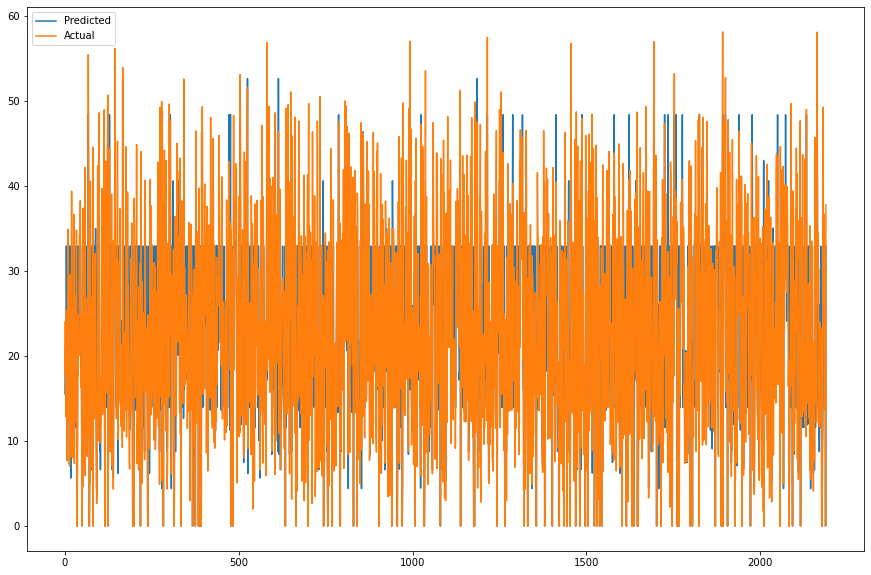

In [86]:
#Ploting figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

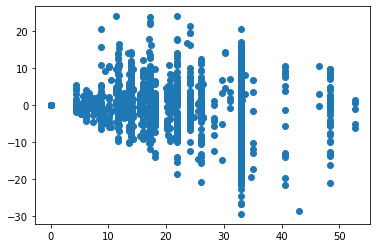

In [87]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

## Implementing Random Forest Regression

In [88]:
#importing package
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [90]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE)


#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_r)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9894176991456508
MSE : 1.6295756918144513
RMSE : 1.2765483507546636
MAE : 0.8092350196090387
R2 : 0.9894176991456508
Adjusted R2 : 0.9891855011343742


Here r2 score value is 0.98 it means that our model is able to capture most of the data variance.

In [91]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [92]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 12.815625503163677
RMSE : 3.5798918284165624
MAE : 2.2226920875674816
R2 : 0.9188711951922407
Adjusted R2 : 0.9170910580185877


The r2_score for the test set is 0.91 it means that our linear model is performing well on the data.

In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [94]:
rf_model.feature_importances_

array([3.11631593e-01, 1.56235508e-01, 1.21485566e-02, 1.17759899e-02,
       2.95080249e-02, 3.56879516e-02, 1.50558693e-03, 4.92550607e-03,
       1.36155958e-02, 2.03358822e-02, 3.02388763e-02, 2.59186886e-02,
       8.41350121e-03, 4.12298223e-03, 1.43000097e-02, 9.85684768e-04,
       2.17960909e-03, 1.11947058e-03, 2.89878634e-04, 2.87324036e-04,
       4.03769839e-04, 1.33536021e-03, 3.58921653e-03, 1.03033101e-02,
       3.15149684e-02, 1.75238545e-02, 1.21498938e-02, 1.26793547e-02,
       9.38346574e-03, 3.55700241e-03, 4.10294153e-03, 9.49403267e-04,
       9.02679350e-03, 3.97915077e-03, 1.53147463e-01, 3.77403980e-04,
       3.75344698e-03, 1.25434213e-03, 1.66442419e-03, 2.51551503e-03,
       6.25967765e-04, 2.35852456e-03, 7.87566682e-04, 2.75154624e-03,
       5.04991446e-03, 7.48769108e-04, 1.92404111e-02])

In [95]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

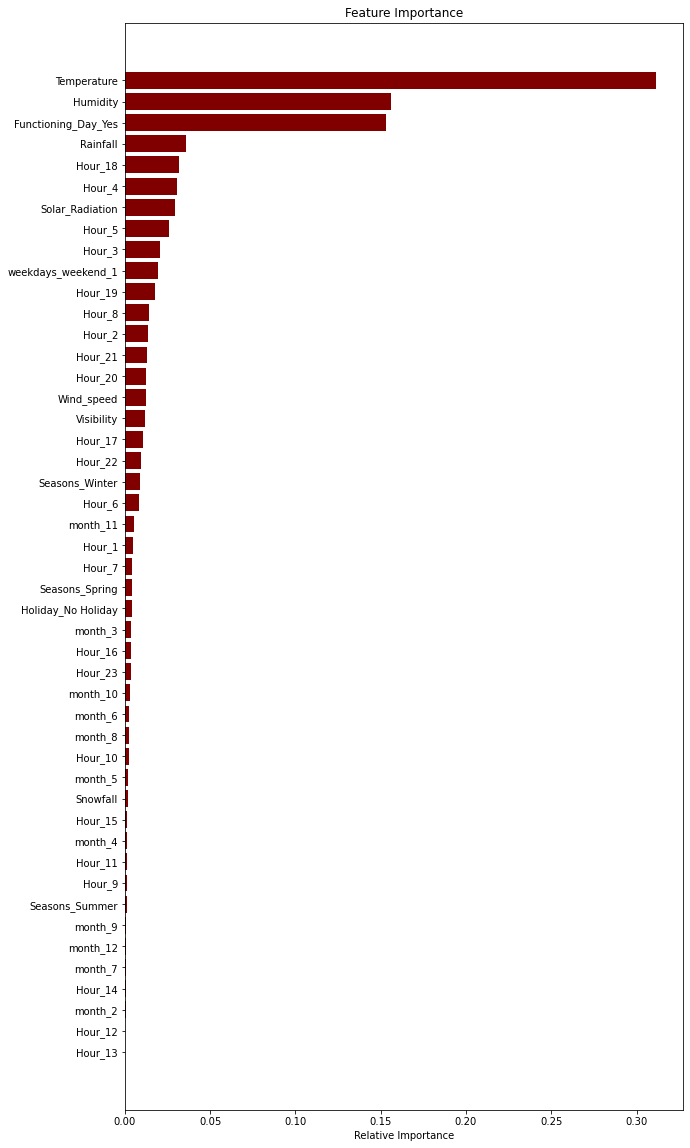

In [96]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Implementing Gradient Boosting Regression

In [97]:
#importing package
from sklearn.ensemble import GradientBoostingRegressor
# Creating an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [98]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [99]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_g)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.8789016499095264
MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.2690035692731247
R2 : 0.8789016499095264
Adjusted R2 : 0.8762444965695393


Here r2 score value is 0.87 it means that our model is able to capture most of the data variance.

In [100]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [101]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.4928587865599914
R2 : 0.8652280396863458
Adjusted R2 : 0.8622708584843188


The r2_score for the test set is 0.86 it means that our linear model is performing well on the data.

In [102]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [103]:
gb_model.feature_importances_

array([3.21390752e-01, 1.28054219e-01, 5.06472446e-04, 4.41033341e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 0.00000000e+00,
       1.72209214e-03, 9.33502112e-05, 2.82254756e-04, 4.18000398e-03,
       0.00000000e+00, 2.71539952e-03, 0.00000000e+00, 6.76468137e-03,
       5.12015005e-03, 2.89720073e-04, 1.79854096e-02])

In [104]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [105]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

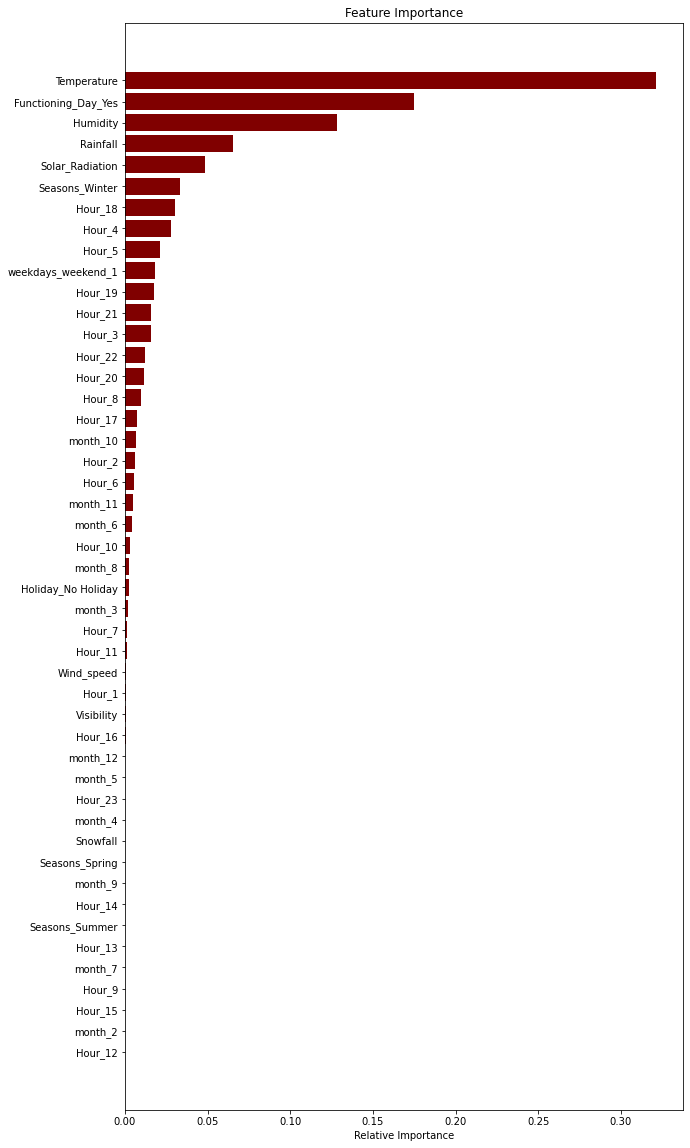

In [106]:
#Ploting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Hyperparameter tuning

## Now, let us try to tune some hyperparameters and see if the performance of our model improves.

## Gradient Boosting Regressor with GridSearchCV

In [107]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [108]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [109]:
#importing package
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.5s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   1.6s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   1.6s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   2.7s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=10

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [110]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [111]:
gb_optimal_model = gb_grid.best_estimator_

In [112]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [113]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.9515896672300013
MSE : 7.454740004128373
RMSE : 2.7303369762958516
MAE : 1.8489194833919358
R2 : 0.9515896672300013
Adjusted R2 : 0.9505274423746372


In [115]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [116]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 12.392760556291105
RMSE : 3.520335290322657
MAE : 2.4005915565405354
R2 : 0.921548124829924
Adjusted R2 : 0.9198267251413182


In [117]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [118]:
gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.67911329e-03, 1.06796008e-03,
       1.62472784e-02, 2.18064007e-03, 1.57198472e-01, 7.75938658e-05,
       1.32320249e-03, 1.09973153e-04, 1.66051097e-03, 2.73793528e-03,
       1.57302152e-03, 6.25379835e-03, 7.62045639e-05, 6.35447256e-03,
       4.56464936e-03, 1.05534757e-03, 2.33718468e-02])

In [119]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [120]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

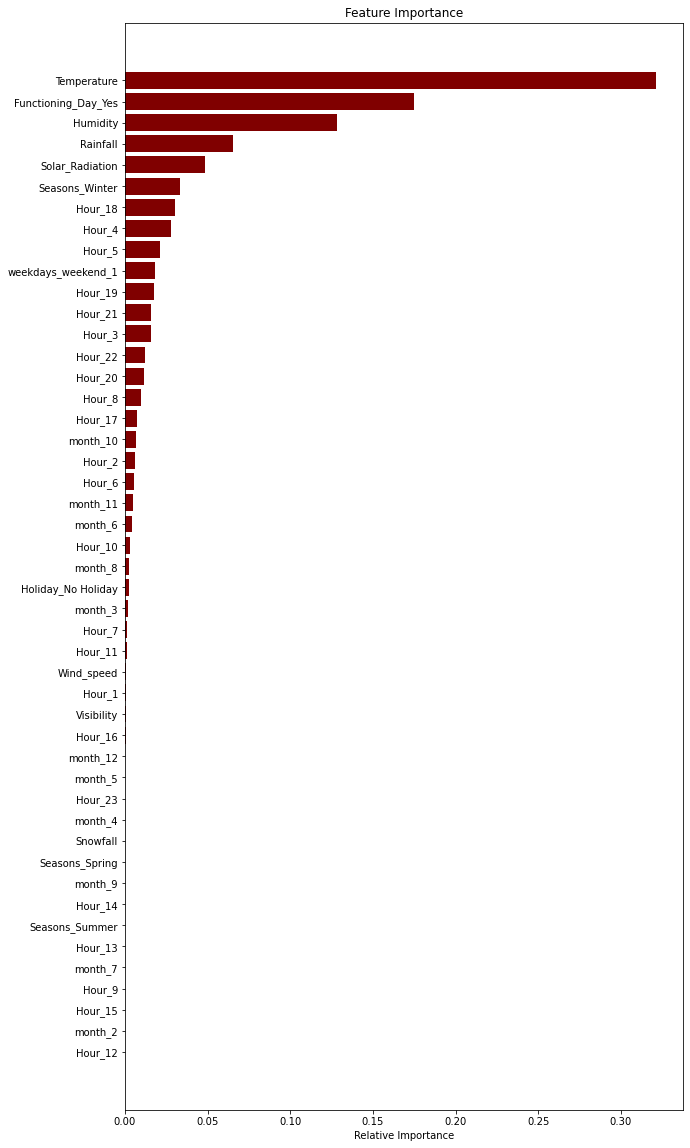

In [121]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# CONCLUSION
## In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

## Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and GBoost. We did hyperparameter tuning to improve our model performance. Following are the results of our evaluation:

In [122]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.474  35.078  5.923   
             1                Lasso regression   7.255  91.594  9.570   
             2                Ridge regression   4.474  35.078  5.923   
             3          Elastic net regression   5.792  57.574  7.588   
             4        Dicision tree regression   4.849  44.381  6.662   
             5        Random forest regression   0.809   1.630  1.277   
             6    Gradient boosting regression   3.269  18.648  4.318   
             7  Gradient Boosting gridsearchcv   1.849   7.455  2.730   
Test set     0               Linear regression   4.410  33.275  5.768   
             1                Lasso regression   7.456  96.775  9.837   
             2                Ridge regression   4.410  33.277  5.769   
             3      Elastic net regression Test  5.874  59.451  7.710   
             4        Dicision tree regression   5.035  48.462  6.961   
             5        Random forest regression   2.223  12.816  3.580   
             6    Gradient boosting regression   3.493  18.648  4.318   
             7  Gradient Boosting gridsearchcv   2.401  12.393  3.520   

                R2_score  Adjusted R2  
Training set 0     0.772         0.77  
             1     0.405         0.39  
             2     0.772         0.77  
             3     0.626         0.62  
             4     0.712         0.71  
             5     0.989         0.99  
             6     0.879         0.88  
             7     0.952         0.95  
Test set     0     0.789         0.78  
             1     0.387         0.37  
             2     0.789         0.78  
             3     0.624         0.62  
             4     0.693         0.69  
             5     0.919         0.92  
             6     0.865         0.86  
             7     0.922         0.92

• No overfitting is seen.

• Random forest Regressor gives the highest R2 score of 99% for Train Set and Gradient Boosting gridsearchcv gives the highest R2 score of 92% for Test set.

• We can deploy this model.

## Future Extensions:
As this dataset has time features we can also extend the work to dynamic time series modelling which might give us even better results.

In [126]:
import pickle

In [127]:
filename = 'trained_model_bike.pkl'
pickle.dump(gb_optimal_model, open(filename, 'wb'))